# Ejercicio 2: *Clustering*

Agrupando colores. Vamos a crear imágenes con una cantidad fija de colores.

### 1. Importa las librerias

Vamos a necesitar `KMeans` de `sklearn.cluster`, `imread` de `matplotlib.image`, `matplotlib.pyplot` y `numpy`

In [1]:
import numpy as np
import pandas as pd
import os

from sklearn.cluster import KMeans
from matplotlib.image import imread
import matplotlib.pyplot as plt

In [2]:
# Directorio y creación de imágenes
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### 2. Lee una imagen

Utiliza alguna foto que tengas en tu ordenador y leela con la función `imread`.

Consejo: utiliza una imagen pequeña si no quieres tardar una eternidad en que se ejecute el *K-Means*.

In [5]:
imagen=imread('./data/mariposa.png')
imagen.shape

(656, 1167, 4)

Muestra la imagen para ver que se ha cargado bien.

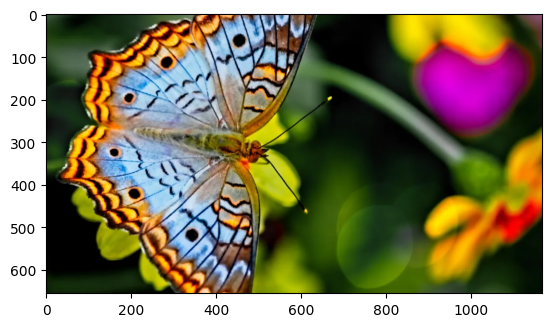

In [6]:
plt.imshow(imagen);

### 3. Modifica la estructura de la imagen

Queremos que cada pixel sea una observación por lo que tenemos que transformar nuestra imagen de un vector de forma (alto, ancho, color) a (alto x ancho, color). Color será siempre 3, que son los tres canales de los colores.

Ej: (300, 400, 3) -> (120000, 3)

In [7]:
imagen.size

3062208

In [8]:
imagen[:, :, 3] #Vemos que el ultimo 'color' que aparece esta lleno de unos lo podriamos eliminar para quedarme solo con el rgb

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

me quedo unicamente con la imagen en la escala RGB

In [9]:
imagen_rgb = imagen[:, :, :3]

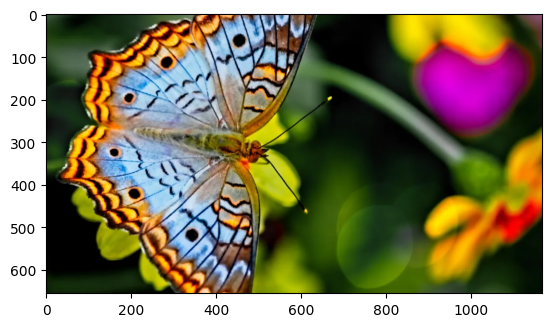

In [10]:
plt.imshow(imagen_rgb);

(alto,ancho,colo)--------(altoxancho,color)

In [11]:
X=imagen_rgb.reshape(-1,3)
X.shape

(765552, 3)

In [12]:
imagen_rgb.size/3

765552.0

### 4. *K-means*

Haz un *K-means* con la imagen de entrada (con la nueva forma que le hemos dado). K será el número de colores que quieras que tenga tu imagen de salida.

In [13]:
seed=42
k=10
kmeans=KMeans(n_clusters=k,random_state=seed, n_init='auto').fit(X)

### 5. Sustituye cada valor por su centroide

Una vez hemos entrenado el *K-means* entre otros parámetros de salida tiene `cluster_centers_` y `labels_`. Utilízalos para crear una nueva imagen (recuerda que las imágenes simplemente son vectores numéricos) en la que cada pixel se sustituye por su centroide correspondiente.

k: numero de clusters (centroides)

In [14]:
kmeans.labels_ #Cluster asignado a cada punto

array([6, 6, 6, ..., 0, 0, 0])

In [15]:
kmeans.cluster_centers_ #Donde esta ubicado cada centroide

array([[0.04806402, 0.08605483, 0.03189088],
       [0.6278752 , 0.60118926, 0.5589103 ],
       [0.7989714 , 0.35049638, 0.04322225],
       [0.89735067, 0.7232264 , 0.05314028],
       [0.72032833, 0.00792119, 0.6533766 ],
       [0.41247684, 0.13654147, 0.10313272],
       [0.20010132, 0.3047878 , 0.0698723 ],
       [0.6377313 , 0.77284896, 0.8892909 ],
       [0.3641565 , 0.41011792, 0.35643244],
       [0.4973031 , 0.5211781 , 0.01931526]], dtype=float32)

In [16]:
segmentado=kmeans.cluster_centers_[kmeans.labels_]
segmentado

array([[0.20010132, 0.3047878 , 0.0698723 ],
       [0.20010132, 0.3047878 , 0.0698723 ],
       [0.20010132, 0.3047878 , 0.0698723 ],
       ...,
       [0.04806402, 0.08605483, 0.03189088],
       [0.04806402, 0.08605483, 0.03189088],
       [0.04806402, 0.08605483, 0.03189088]], dtype=float32)

### 6. Modifica la estructura de la imagen

Para trabajar con el *K-means* requeriamos que la imagen original fuese un solo vector, ahora como queremos volver a tener la imagen para volver a mostrarla debemos hacer el proceso inverso a el paso 3 (si has guardado la forma de la imagen original te resultará más facil hacer este paso).

In [17]:
segmentado=segmentado.reshape(imagen_rgb.shape)

### 7. Imprime y guarda en tu ordenador la imagen resultante

Saving figure prueba


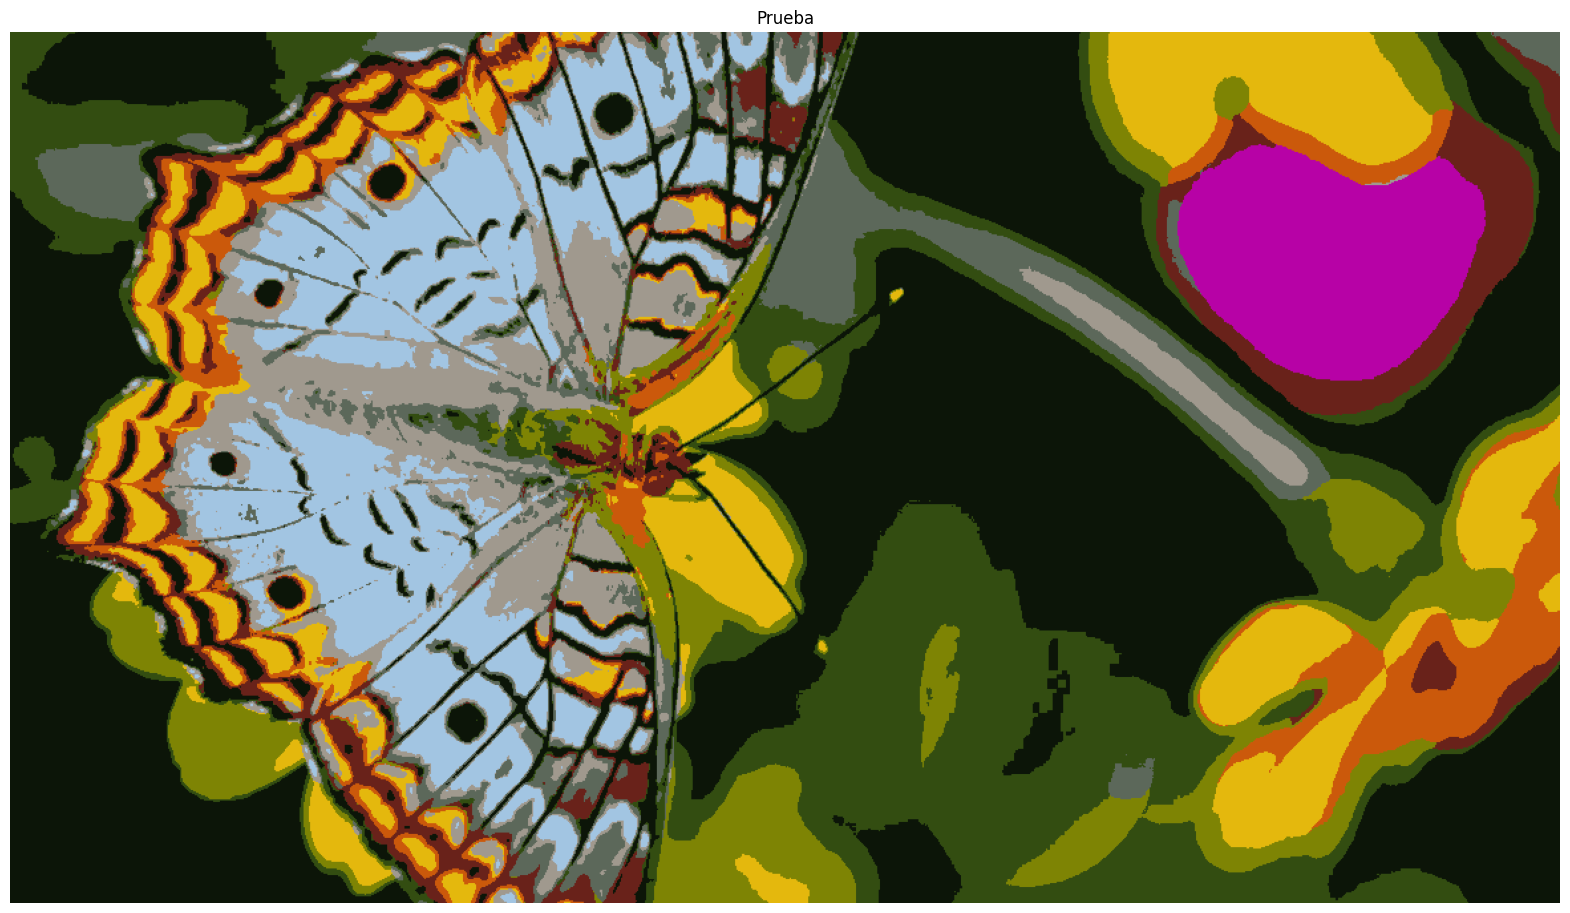

In [18]:
plt.figure(figsize=(20,15))
plt.imshow(segmentado)
plt.title("Prueba")
plt.axis('off')

save_fig('prueba', tight_layout=False)
plt.show()

In [20]:
save_fig('prueba', tight_layout=False);

Saving figure prueba


<Figure size 640x480 with 0 Axes>

### 8. Crea una función
Crea una función que tenga como argumentos de entrada una imagen, el numero de colores que quieres que tenga, y si se quiere guardar o mostrar por pantalla

In [21]:
def funcion(imagen,n_colores,guardar:bool):
    #Tenemos en cuenta la escala RGB y reestructuramos los datos
    imagen_rgb=imagen[:,:,:3]
    X=imagen_rgb.reshape(-1,3)

    #Aplicamos el algoritmo Kmeans
    seed=42
    kmeans=KMeans(n_clusters=n_colores,random_state=seed,n_init='auto').fit(X)

    #Sustituimos cada valor por su centroide y devolvemos la estructura original
    segmentado=kmeans.cluster_centers_[kmeans.labels_]
    segmentado=segmentado.reshape(imagen_rgb.shape)

    #Guardar imagen
    if guardar==True:
        plt.figure(figsize=(20,15))
        plt.imshow(segmentado)
        plt.title("Prueba")
        plt.axis('off')

        save_fig('{}colores'.format(n_colores), tight_layout=False)
        plt.show()
    else:
        plt.figure(figsize=(20,15))
        plt.imshow(segmentado)
        plt.title("Prueba")
        plt.axis('off')
        plt.show()


Saving figure 30colores


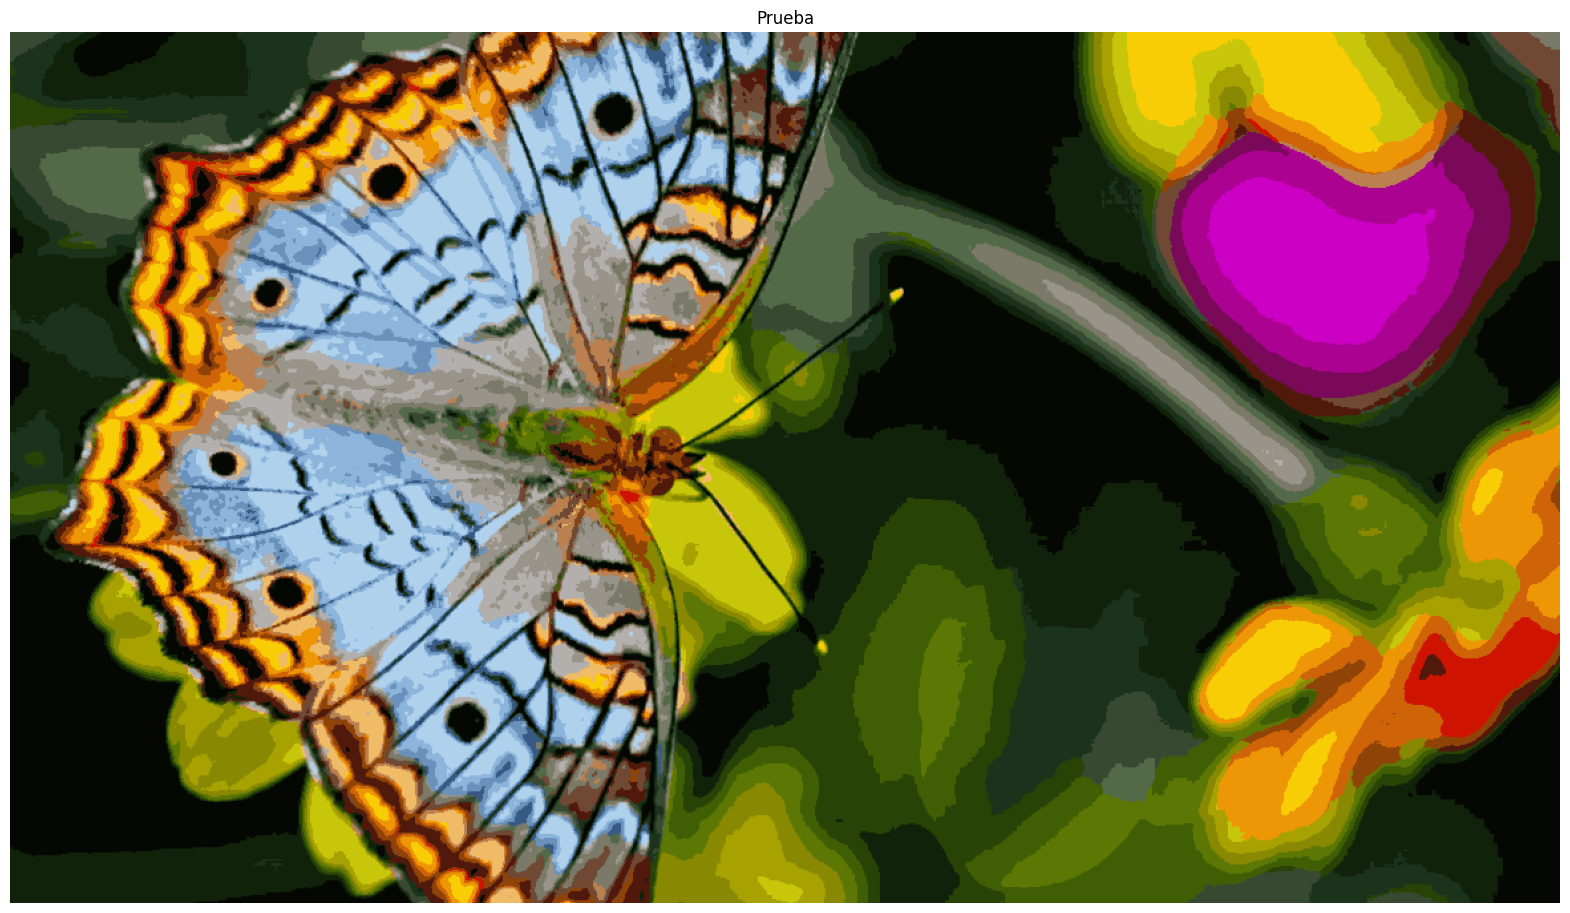

In [22]:
imagen=imread('./data/mariposa.png')
funcion(imagen,30,True)